# Group Assignment: Data Preparation and Visualization

## 1. Group members


Shefali Bisht
Megha Sree Nalla
Genaro Demuner Molina
Siddharth Ram Mantri
***

## 2. Contribution report

After completing the assignment, please answer the following questions **as a group** by adding your answers within this markdown block.

1. In a few sentences, describe each group member's individual contributions to the submission. Be as specific as possible (e.g. coordinated group efforts, specific problems answered, specific problems reviewed/revised, sections of the submission written, etc.).

Genaro: My contribution in this assignment was in part 4, review the obtained results and propose the hypothesis for further analysis, and how test it. To make this proposes I focused on the charts and numbers obtained during the process, and at the same time defined the growths and trends of the product to improve strategic interventions.

Megha: 
For this assignment my contributions included executing relevant SQL queries with SQLAlchemy, and to generate visualizations with Pandas and Seaborn to shpw the historical sales trends and weekly performance against targets for different product types.

Siddharth: 
For this assignment, my primary contributions revolved around part 1. I contributed by understanding the database and creating SQL queries to extract relevant data from the database. I also created visualizations necessary to effectively communicate findings from the data for part 1. Additionally, I collaborated with the team on crafting SQL queries for parts 2 and 3.

Shefali: I focused on maintaining team coordination and brainstorming with team members for part 2.1 and part 3.1

2. In a few sentences, describe what was learned in completing this assignment. In particular, describe what was learned through the **specific individual contributions** mentioned above.

Genaro: 
Because I have no experience in the field of programming, by completing this assignment I increased my learning a little more in database creation and manipulation and the use of some functions in Python.

Megha:
I gained experience in writing SQL queries by completing this assignment. I also learned how to execute these queries using SQLAlchemy and process the resulting data in Python using Pandas.  I improved my skills in creating effective data visualizations using Seaborn following best practices for chart design,style changes, labeling etc.

Siddharth:
By completing this assignment, I effectively learned the usage of SQLAlchemy to extract data from a database and use this data to create dataframes using Pandas for further processing. Through this assignment, I also improved my ability to effectively visualize data using Seaborn and Matplotlib. This assignment also helped me improve my ability to understand databases and create advanced queries using window functions.

Shefali:
Through this exercise I learnt how to effectively apply my analytical skills into solving business problems. The visualization part was interesting as it provided an interactive way of analyzing the query results and understand the results better. For me the best part was part 4(Takeaway from analysis) as it took us beyond the technical SQL/Pandas part. Building up on hypothesis, and understanding the trends from an economic, business, and consumer perspective really showed me the power of data analytics. I can connect my technical skills to the real world business applications.


## 3. Assignment

### Instructions: 
You will be presented with a scenario and will need to utilize your SQL and python skills to complete this assignment successfully. 

Put this .ipynb file in the `jupyter_notebooks` folder in your Docker SQLPython Container directory.  Then you will be able to connect to the database and run your code without issue.

Each group will submit two files:
1. A single Jupyter Notebook (.ipynb).  **You must run all cells before submitting.** This notebook should have all of the relevant visualizations and output displayed properly.  We will restart and run all of the code from this notebook, which should not produce any errors.
2. A PDF version (.pdf) of the Jupyter Notebook. This PDF should have all of the relevant visualizations and output displayed properly. 

In [6]:
#run this code first to connect to the database and verify the connection is working
## DO NOT MODIFY THIS CODE BLOCK
## If you have placed this notebook in the jupyter notebooks folder properly, 
## this block should return the first two rows of the customers table

from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="behappy",
    host="postgres",
    port=5432,
    database="sqlda"))

engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

## Scenario 

You are a team of extremely successful data scientists at a top motor dealership company, ZoomZoom. You need to create summary tables and visualizations that your boss will present at the next company shareholder meeting.  She has sent you the following e-mail describing what she needs.

***
From: importantboss@zoomzoom.com

To: datascienceteam@zoomzoom.com

Subject: Data request for shareholder meeting

For our next shareholder meeting, we need to provide more information about sales performance across product lines.  Please send me information to address the following items for our next shareholder meeting along with your thoughts.

1. Popularity of products (4 most popular and 4 least popular)
2. Across all products, how are they trending?
3. How well are we meeting our weekly sales targets for scooters? for automobiles?

Thank you!

-Important Boss

***

Your team promptly comes up with the following plan.

## Part 1: Visualizing the popularity of products

1. Write a SELECT query that returns the total unit sales for each product model from January 1, 2016 to now.  The table should have two columns, `model` and `total_unit_sales`, with one row for each model ordered by `total_unit_sales` in *descending* order. 


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `sales_by_model`.


3. Display the rows in `sales_by_model` corresponding to the 4 most popular products based on unit sales in *descending* order.


4. Display the rows in `sales_by_model` corresponding to the 4 least popular products based on unit sales in *ascending* order.


5. Visualize unit sales by product model for the most and least popular products discovered in 1.3 and 1.4.  You can use more than one visualization.  These should be **presentation ready** (e.g. appropriate and complete titles and axis labels, remove unnecessary/distracting features, display date range for total unit sales, no overlapping axis labels, etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [7]:
#1.1
result = engine.execute("select p.model, sum(s.sales_amount) as total_unit_sales from sales s join products p on s.product_id = p.product_id where s.sales_transaction_date >= '2016-01-01' group by p.model order by total_unit_sales desc;").fetchall()


In [8]:
#1.2 create dataframe
sales_by_model = pd.DataFrame(result, columns=['model', 'total_unit_sales'])
print(sales_by_model)

                 model  total_unit_sales
0            Model Chi      7.992700e+07
1          Model Sigma      5.213800e+07
2          Model Gamma      4.410980e+07
3        Model Epsilon      2.653350e+07
4                Lemon      4.730405e+06
5                  Bat      4.202270e+06
6  Bat Limited Edition      3.881165e+06
7         Lemon Zester      3.751543e+05


In [9]:
#1.3 display 4 most popular models   (dataframe is already sorted in descending order)
most_popular_models= sales_by_model.head(4) 
print(most_popular_models)

           model  total_unit_sales
0      Model Chi        79927000.0
1    Model Sigma        52138000.0
2    Model Gamma        44109800.0
3  Model Epsilon        26533500.0


In [10]:
#1.4 display 4 least popular models (sorting the dataframe in ascending orders and taking the 1st four rows)
least_popular_models = sales_by_model.sort_values(by = 'total_unit_sales', ascending = True).head(4)
print(least_popular_models)

                 model  total_unit_sales
7         Lemon Zester      3.751543e+05
6  Bat Limited Edition      3.881165e+06
5                  Bat      4.202270e+06
4                Lemon      4.730405e+06


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='model', ylabel='total_unit_sales'>

Text(0.5, 1.0, 'Total Unit Sales of Most Popular Products (Jan 1, 2016 to Present)')

Text(0.5, 0, 'Product Model')

Text(0, 0.5, 'Total Unit Sales')

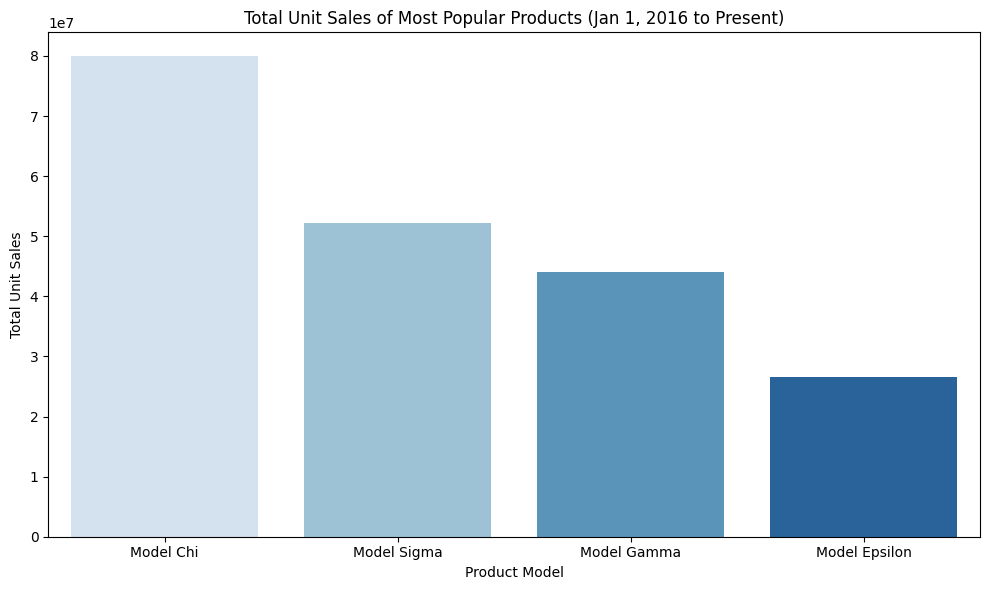

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='model', ylabel='total_unit_sales'>

Text(0.5, 1.0, 'Total Unit Sales of Least Popular Products (Jan 1, 2016 to Present)')

Text(0.5, 0, 'Product Model')

Text(0, 0.5, 'Total Unit Sales')

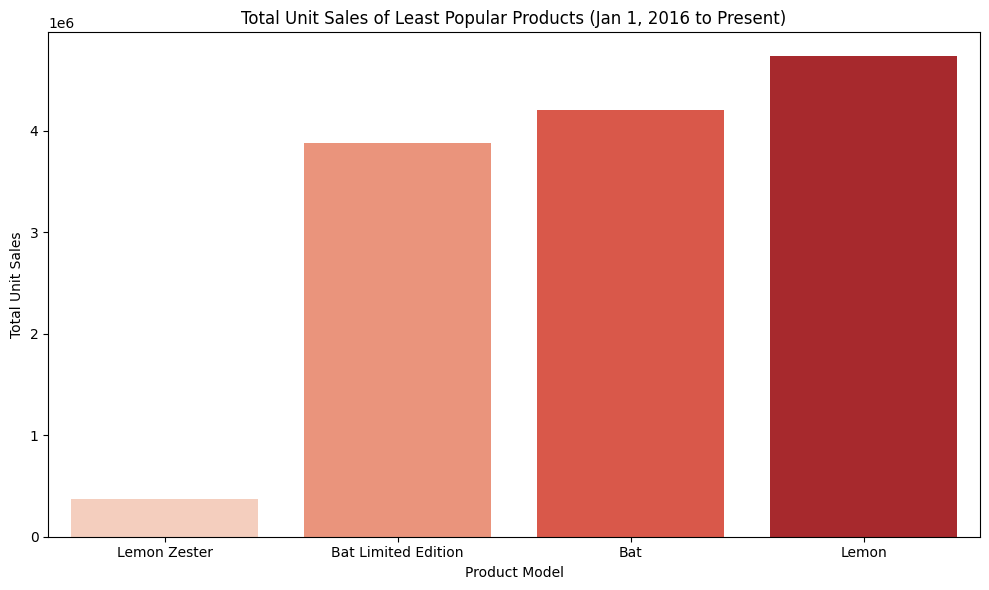

In [11]:
#1.5 visualize most and least popular models

# Plotting for Most popular products
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='total_unit_sales', data=most_popular_models, palette='Blues')
plt.title('Total Unit Sales of Most Popular Products (Jan 1, 2016 to Present)')
plt.xlabel('Product Model')
plt.ylabel('Total Unit Sales')
plt.tight_layout()
plt.show()

# Plotting for least popular products
plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='total_unit_sales', data=least_popular_models, palette='Reds')
plt.title('Total Unit Sales of Least Popular Products (Jan 1, 2016 to Present)')
plt.xlabel('Product Model')
plt.ylabel('Total Unit Sales')
plt.tight_layout()
plt.show()

## Part 2: Visualizing product line trends

Create a table and visualization of historical cumulative sales amounts by product model. 

To do this, perform the following steps:

1. Write a SELECT query that returns the cumulative total sales amount for each product model from January 1, 2016 to now.  The table should have five columns, `product_id`, `model`, `product_type`, `sales_transaction_date`, and `cumulative_sales`. `cumulative_sales` represents the cumulative sales amount from January 1, 2016 to the `sales_transaction_date` for products identified by `model`.  There should be a row for each distinct combination of `model` and `sales_transaction_date` in the `sales` table (*hint*: window function)


2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `cumulative_sales_byproduct`.
    
    
3. Appropriately visualize historical cumulative sales by product across sales transaction dates separately for product types *in a single plot* (*hint*: seaborn). Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `sales_transaction_date` and `product_type` are replaced with appropriate text like 'Date' and 'Type', etc.). 

Include the code needed for each component of part 1 in the appropriate code block below.

In [50]:
#2.1
query2 = """with cte as (
select p.model, p.product_id, p.product_type, cast(s.sales_transaction_date as Date) as sales_transaction_date, 
	sum(s.sales_amount) sales_amount
from sales s 
right join products p on s.product_id = p.product_id 
where s.sales_transaction_date >= '2016-01-01' 
group by p.model, p.product_id, p.product_type, cast(s.sales_transaction_date as Date)
)
select model, product_id, product_type,sales_transaction_date, sales_amount, 
sum(sales_amount) over(partition by  model, product_id, product_type order by sales_transaction_date) as cumulative_sales
from cte
order by  model, product_id, product_type, sales_transaction_date"""


In [51]:
#2.2 create dataframe
query_results = engine.execute(query2).fetchall()

cumulative_sales_byproduct = pd.DataFrame(query_results, columns=['model', 'product_id', 'product_type', 'sales_transaction_date', 'sales_amount', 'cumulative_sales'])
print(cumulative_sales_byproduct)

            model  product_id product_type sales_transaction_date  \
0             Bat           7      scooter             2016-10-10   
1             Bat           7      scooter             2016-10-11   
2             Bat           7      scooter             2016-10-12   
3             Bat           7      scooter             2016-10-13   
4             Bat           7      scooter             2016-10-14   
...           ...         ...          ...                    ...   
4999  Model Sigma           6   automobile             2018-09-21   
5000  Model Sigma           6   automobile             2018-09-22   
5001  Model Sigma           6   automobile             2018-09-23   
5002  Model Sigma           6   automobile             2018-09-26   
5003  Model Sigma           6   automobile             2018-09-28   

      sales_amount  cumulative_sales  
0         5399.910      5.399910e+03  
1         3599.940      8.999850e+03  
2         5819.903      1.481975e+04  
3         5759.

<Figure size 1200x600 with 0 Axes>

<AxesSubplot: xlabel='sales_transaction_date', ylabel='cumulative_sales'>

<AxesSubplot: xlabel='sales_transaction_date', ylabel='cumulative_sales'>

Text(0.5, 1.0, 'Historical Cumulative Sales by Product Type\n(Jan-01-2016 to May-31-2019)')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Cumulative Sales')

(array([16801., 16983., 17167., 17348., 17532., 17713., 17897., 18078.]),
 [Text(16801.0, 0, '2016-01'),
  Text(16983.0, 0, '2016-07'),
  Text(17167.0, 0, '2017-01'),
  Text(17348.0, 0, '2017-07'),
  Text(17532.0, 0, '2018-01'),
  Text(17713.0, 0, '2018-07'),
  Text(17897.0, 0, '2019-01'),
  Text(18078.0, 0, '2019-07')])

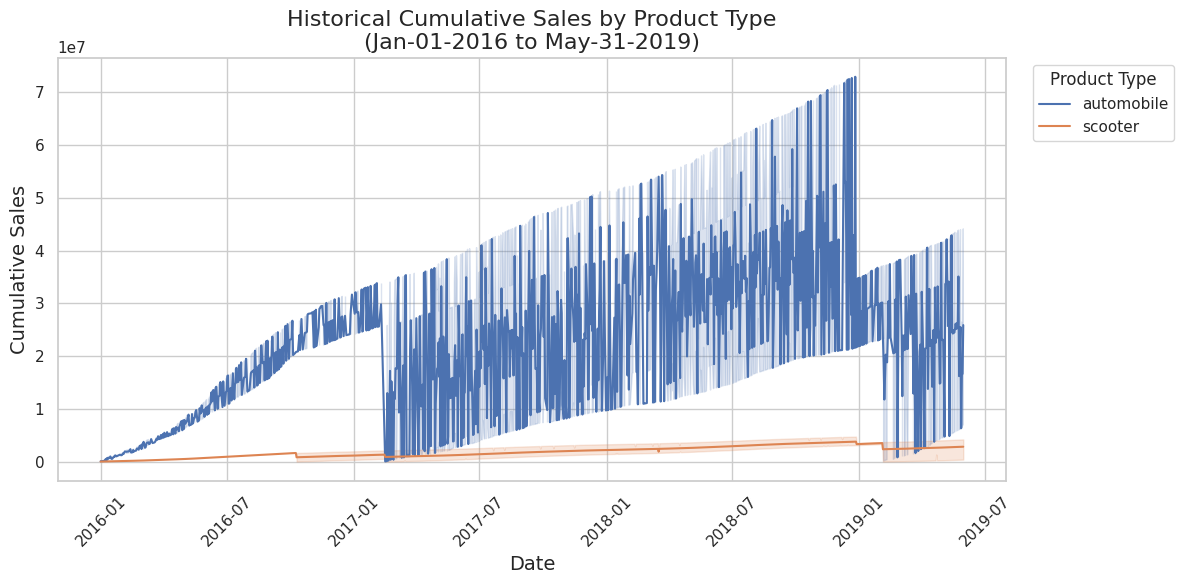

In [81]:
#2.3
cumulative_sales_byproduct['sales_transaction_date'] = pd.to_datetime(cumulative_sales_byproduct['sales_transaction_date'])

# Create a line plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
for product_type, group in cumulative_sales_byproduct.groupby('product_type'):
    sns.lineplot(x='sales_transaction_date', y='cumulative_sales', data=group, label=product_type)

min_date = cumulative_sales_byproduct['sales_transaction_date'].min().strftime('%b-%d-%Y')
max_date = cumulative_sales_byproduct['sales_transaction_date'].max().strftime('%b-%d-%Y')
date_range = f'{min_date} to {max_date}'

plt.title(f'Historical Cumulative Sales by Product Type\n({date_range})', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels 

# Adding legend outside the plot
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Product Type')

# Show the plot
plt.tight_layout()
plt.show()

## Part 3: Weekly sales targets

We define the target sales of a week as the average of the sales over the preceding 3 weeks. Create a table and visualization of weekly sales amounts and target sales by product type from January 1, 2016 to now.  

To do this, perform the following steps:
    
   1. Write a SELECT query that returns three columns: `product_type`,`sales_transaction_week`, `weekly_sales`, and `weekly_target`.  `weekly_sales` represents the total sales amount for the week of `sales_transaction_date` for product type identified by `product_type`.  There should be a row for each distinct combination of `product_type` and `sales_transaction_week` in the `sales` table. Additionally, `weekly_target` is the average of the 3 preceding `weekly_sales` values not including the current week (*hint*: window frames).
    
    
   2. Use SQLAlchemy to execute the query and store the results in a pandas dataframe called `product_weekly_sales`.
    
    
   3. Appropriately visualize weekly sales and weekly target over time *in a single plot* by product type. In other words, there should be one visualization for scooters and one for automobiles. It is then your choice whether those visualizations are subplots or independent. Visualization should be **presentation ready** (e.g. appropriate and complete titles and legend/axis labels, remove unnecessary/distracting features, display date range for total sales, no overlapping axis labels, integer-valued dealership IDs, states indicated clearly, variable names like `sales_transaction_date` and `product_type` are replaced with appropriate text like 'Date' and 'Type', etc.). 

**Hint**: In order to get the week from a date, we can use the transformation function, `DATE_TRUNC`. An example query is provided in the next code block and the help page can be found here: https://www.postgresql.org/docs/current/functions-datetime.html

In [10]:
# hint:
query_hint = """
SELECT  sales_transaction_date,
		DATE_TRUNC('month',sales_transaction_date)::DATE AS month,
		DATE_TRUNC('year',sales_transaction_date)::DATE AS year,
		DATE_TRUNC('week',sales_transaction_date)::DATE AS week
FROM sales
LIMIT 10;
"""

pd.read_sql_query(query_hint, engine)

,sales_transaction_date,month,year,week
0,2017-07-19 08:38:41,2017-07-01,2017-01-01,2017-07-17
1,2017-08-14 09:59:02,2017-08-01,2017-01-01,2017-08-14
2,2019-01-20 10:40:11,2019-01-01,2019-01-01,2019-01-14
3,2017-05-09 14:20:04,2017-05-01,2017-01-01,2017-05-08
4,2019-05-21 20:03:21,2019-05-01,2019-01-01,2019-05-20
5,2017-06-14 11:37:10,2017-06-01,2017-01-01,2017-06-12
6,2019-02-26 09:25:19,2019-02-01,2019-01-01,2019-02-25
7,2017-11-15 01:28:23,2017-11-01,2017-01-01,2017-11-13
8,2017-06-25 22:53:37,2017-06-01,2017-01-01,2017-06-19
9,2019-01-13 08:28:44,2019-01-01,2019-01-01,2019-01-07


In [53]:
#3.1
query3 = """with cte as (
select p.product_type, date_trunc('week', s.sales_transaction_date)::DATE as sales_transaction_week, 
	sum(s.sales_amount) as weekly_sales
from sales s 
join products p on s.product_id = p.product_id 
where s.sales_transaction_date >= '2016-01-01' 
group by p.product_type,date_trunc('week', s.sales_transaction_date)::DATE
)
select product_type, sales_transaction_week,weekly_sales,
AVG(weekly_sales) over(partition by product_type order by sales_transaction_week rows between 3 preceding and 1 preceding) as weekly_target
from cte
order by product_type, sales_transaction_week """


In [32]:
#3.2
query_results = engine.execute(query3).fetchall()

# Creating DataFrame
product_weekly_sales = pd.DataFrame(query_results, columns=['product_type', 'sales_transaction_week', 'weekly_sales', 'weekly_target'])
print(product_weekly_sales)


    product_type sales_transaction_week  weekly_sales  weekly_target
0     automobile             2015-12-28     65500.000            NaN
1     automobile             2016-01-04    845450.000   65500.000000
2     automobile             2016-01-11    570900.000  455475.000000
3     automobile             2016-01-18    826350.000  493950.000000
4     automobile             2016-01-25    396950.000  747566.666667
..           ...                    ...           ...            ...
353      scooter             2019-04-29     97133.153   93023.255667
354      scooter             2019-05-06    107507.942   95954.864000
355      scooter             2019-05-13    118342.816   97318.149333
356      scooter             2019-05-20    106042.947  107661.303667
357      scooter             2019-05-27     69898.675  110631.235000

[358 rows x 4 columns]


<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='sales_transaction_week', ylabel='weekly_sales'>

<AxesSubplot: xlabel='sales_transaction_week', ylabel='weekly_sales'>

Text(0.5, 1.0, 'Weekly Sales and Target for Scooters\n(Dec-28-2015 to May-27-2019)')

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount')

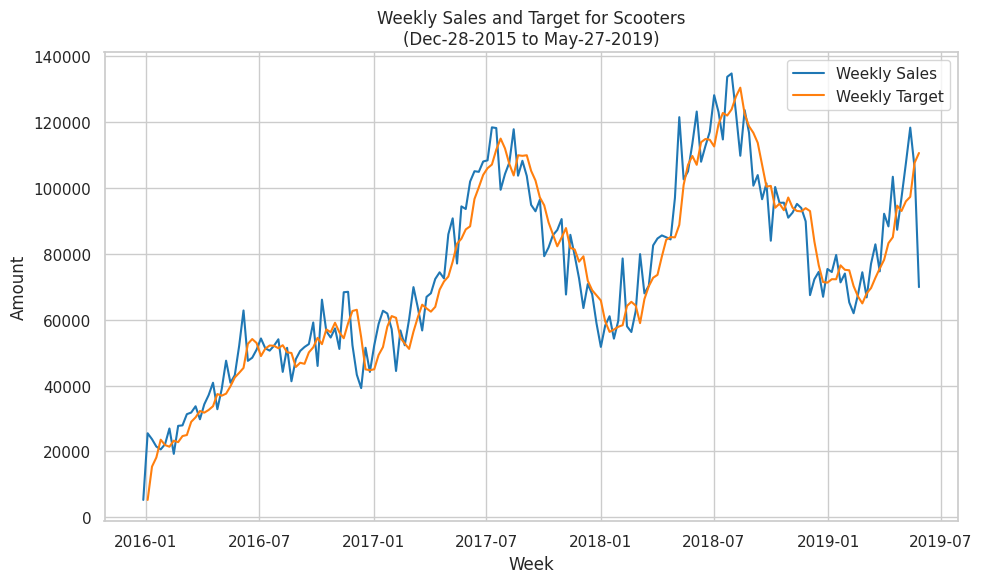

<Figure size 1000x600 with 0 Axes>

<AxesSubplot: xlabel='sales_transaction_week', ylabel='weekly_sales'>

<AxesSubplot: xlabel='sales_transaction_week', ylabel='weekly_sales'>

Text(0.5, 1.0, 'Weekly Sales and Target for Automobiles\n(Dec-28-2015 to May-27-2019)')

Text(0.5, 0, 'Week')

Text(0, 0.5, 'Amount')

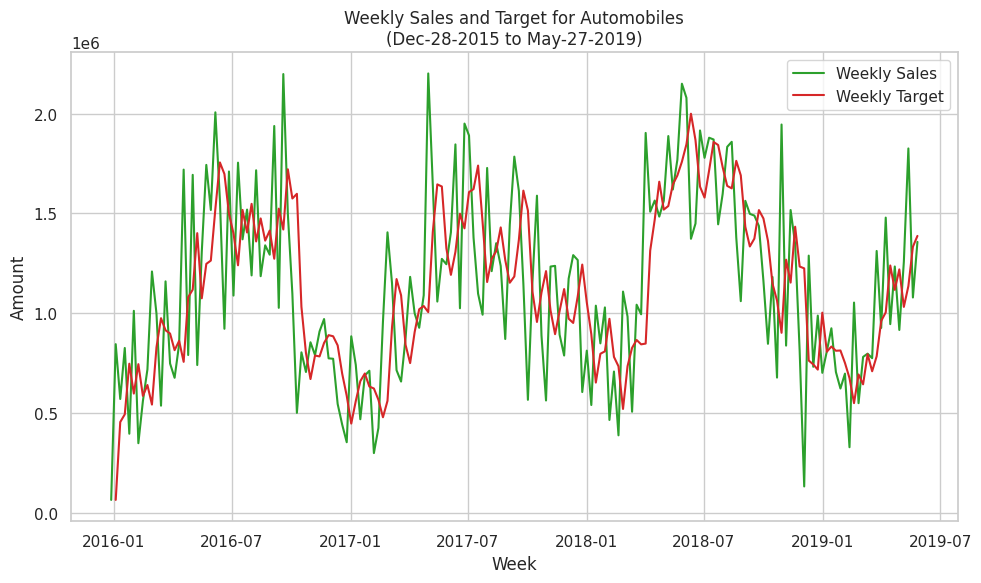

In [80]:
#3.3
product_weekly_sales['sales_transaction_week'] = pd.to_datetime(product_weekly_sales['sales_transaction_week'])

# Filtering data for scooters and automobiles
scooters_data = product_weekly_sales[product_weekly_sales['product_type'] == 'scooter']
automobiles_data = product_weekly_sales[product_weekly_sales['product_type'] == 'automobile']

scooter_palette = ['#1f77b4', '#ff7f0e']  # blue for sales, orange for target
automobile_palette = ['#2ca02c', '#d62728']  # green for sales, red for target

# Plot for scooters
plt.figure(figsize=(10, 6))
sns.lineplot(data=scooters_data, x='sales_transaction_week', y='weekly_sales', label='Weekly Sales', color=scooter_palette[0])
sns.lineplot(data=scooters_data, x='sales_transaction_week', y='weekly_target', label='Weekly Target', color=scooter_palette[1])
min_date_scooters = scooters_data['sales_transaction_week'].min().strftime('%b-%d-%Y')
max_date_scooters = scooters_data['sales_transaction_week'].max().strftime('%b-%d-%Y')
date_range_scooters = f'{min_date_scooters} to {max_date_scooters}'
plt.title(f'Weekly Sales and Target for Scooters\n({date_range_scooters})')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()

# Plot for automobiles
plt.figure(figsize=(10, 6))
sns.lineplot(data=automobiles_data, x='sales_transaction_week', y='weekly_sales', label='Weekly Sales', color=automobile_palette[0])
sns.lineplot(data=automobiles_data, x='sales_transaction_week', y='weekly_target', label='Weekly Target', color=automobile_palette[1])
min_date_automobiles = automobiles_data['sales_transaction_week'].min().strftime('%b-%d-%Y')
max_date_automobiles = automobiles_data['sales_transaction_week'].max().strftime('%b-%d-%Y')
date_range_automobiles = f'{min_date_automobiles} to {max_date_automobiles}'
plt.title(f'Weekly Sales and Target for Automobiles\n({date_range_automobiles})')
plt.xlabel('Week')
plt.ylabel('Amount')
plt.legend()
plt.tight_layout()
plt.show()


## Part 4: Takeaways from the analysis

Provide your thoughts about the analysis above by answering the following questions in the blank markdown cells provided below. No code should be run for this section.

For each of the following questions, answer in as much preciseness and clarity that you can. Refer back to the tables and plots that you have created to back up your answers if necessary. Answer each question in the cell below. You are NOT to code anything for this section. This is for you to reflect on the analysis developed in response to Parts 1-3.

 1. (Part 1) What are some potential hypotheses as to why the the most (least) popular products have the most (least) unit sales?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.

We can propose the next hypothesis for further analysis:
1. Hypothesis: Quality and Value
Most Popular Products: These products are of high quality and offer good value for money.
Least Popular Products: These products may lack quality or not provide good value.
Test: Conduct a survey or review analysis to understand customer perceptions of product quality and value for both popular and unpopular products. Also, analyze product reviews and ratings to gauge customer satisfaction and complaints related to quality and value.
2. Hypothesis: Marketing and Promotion
Most Popular Products: These products might be heavily marketed or promoted through various channels.
Least Popular Products: Insufficient or ineffective marketing efforts might lead to low visibility and awareness.
Test: Examine marketing spend, channels used, and promotional activities for each product. Compare the reach and engagement metrics for marketing campaigns associated with popular and unpopular products.
3. Hypothesis: Brand Reputation
Most Popular Products: Strong brand reputation and trustworthiness can drive popularity.
Least Popular Products: Poor brand reputation or lack of brand recognition might deter customers.
Test: Analyze brand perception surveys, brand awareness metrics, and customer loyalty or trust scores for each product's brand.
4. Hypothesis: Pricing
Most Popular Products: Competitive pricing or perceived value at the price point.
Least Popular Products: Overpriced or perceived as not worth the price.
Test: Compare the pricing strategy of popular and unpopular products. Analyze price elasticity and customer sensitivity to price changes through sales data and pricing experiments.
5. Hypothesis: Product Differentiation
Most Popular Products: Unique features or benefits that set them apart from competitors.
Least Popular Products: Lack of differentiation, making them blend in with other similar products.
Test: Evaluate product features, benefits, and uniqueness. Conduct competitor analysis to identify differentiation factors.
6. Hypothesis: Availability and Distribution
Most Popular Products: Widely available with good distribution channels.
Least Popular Products: Limited availability or poor distribution.
Test: Assess product availability in stores and online platforms. Analyze distribution channels, inventory levels, and stockouts for popular and unpopular products.
7. Hypothesis: Customer Reviews and Recommendations
Most Popular Products: Positive reviews and word-of-mouth recommendations.
Least Popular Products: Negative reviews or lack of recommendations.
Test: Scrutinize customer reviews, ratings, and recommendations on various platforms. Look for patterns in feedback and sentiment related to popular and unpopular products.
By systematically testing these hypotheses, we can gain insights into the factors influencing the popularity and unit sales of products. This information can help in developing strategies to improve product performance and market position.


2. (Part 2): How would you characterize the historical performance of the products visualized in Part 2 (e.g. is growth linear, exponential, constant, or etc.)? Are there major differences across the product types? Describe some of the trends in relative performance over time for the products.  Be specific and cite specific elements of the visualization created in Part 2 to support your claims.  Specify any additional factors you would want to consider that would influence your performance assessment. 

To characterize the historical performance of the products visualized in Part 2, we would need to consider the growth patterns displayed by each product over time. Here's a hypothetical breakdown based on different growth patterns and potential differences across product types:
1. Linear Growth:
Characterization: A steady and consistent increase or decrease in unit sales over time.
Visualization Support: Products with a nearly straight-line trend in their sales data points.
Product Types: Products with stable demand or mature markets might exhibit linear growth.
2. Exponential Growth:
Characterization: Rapid and accelerating growth in unit sales over time.
Visualization Support: Products with a curve that shows an increasingly steep slope over time.
Product Types: New or innovative products with high market demand or trendy items might show exponential growth initially.
3. Constant Growth:
Characterization: Consistent percentage growth in unit sales over time.
Visualization Support: Products with a curve that maintains a consistent growth rate.
Product Types: Products with steady market demand and a consistent customer base might display constant growth.
4. Declining Growth:
Characterization: Decrease in unit sales over time.
Visualization Support: Products with a curve that shows a declining trend in sales.
Product Types: Products facing market saturation, technological obsolescence, or increased competition might experience declining growth.
Trends in Relative Performance Over Time:
New Product Introduction: Products introduced recently might show an initial spike in sales, followed by stabilization or decline.
Seasonal Variations: Products with seasonal demand will exhibit periodic spikes in sales during specific times of the year.
Market Trends: Changes in consumer preferences, technological advancements, or economic conditions can influence sales trends across products.
Specific Elements from Visualization:
Look for patterns such as steep inclines or declines, flat lines indicating stable sales, or erratic fluctuations that might suggest volatile demand.
Identify any outliers or anomalies that deviate significantly from the overall trend, which could indicate external factors influencing sales.
Additional Factors to Consider:
External Factors: Economic conditions, market competition, and consumer sentiment can impact product performance.
Promotional Activities: Marketing campaigns, discounts, and promotions can influence short-term sales trends.
Product Lifecycle: Products at different stages of their lifecycle (introduction, growth, maturity, decline) will have varying sales patterns.
Supply Chain Disruptions: Issues like stockouts or distribution challenges can affect sales continuity.
Customer Reviews and Feedback: Positive or negative reviews can influence consumer purchasing decisions and, consequently, sales performance.
In conclusion, a comprehensive analysis of the historical performance of products should consider the growth patterns displayed, differences across product types, trends in relative performance over time, specific elements from the visualization, and additional influencing factors. This multifaceted approach will provide a more nuanced understanding of product performance and help identify opportunities for improvement or strategic interventions.


3. (Part 3): How would you characterize the weekly sales by product type? Comment on seasonality and any unusual features. How does this compare to the sales targets? Is there seasonality in when we exceed the target? What are some potential hypotheses for what you have described?  Describe how you would test your hypotheses in further analysis.  Do not conduct any additional analyses or write any more queries, just describe in words.


To characterize the weekly sales by product type, we would look at the weekly sales trends, seasonal patterns, and how they align with sales targets. Here's a breakdown of how we might approach this analysis and formulate hypotheses:
Characterization of Weekly Sales by Product Type:
Seasonality: Products might exhibit weekly or monthly seasonality, with sales spiking during specific periods and dropping during others. For instance, seasonal products like summer clothing might sell more during warmer months.
Unusual Features: Any unexpected spikes or drops in sales that don't align with typical seasonal patterns or historical data could indicate unusual features. These might be influenced by external factors like promotions, supply chain disruptions, or unexpected demand shifts.
Comparison with Sales Targets:
Alignment: Assess how closely the actual weekly sales align with the set sales targets. Are the products consistently meeting, exceeding, or falling short of targets?
Deviation: Identify any significant deviations from sales targets and explore the reasons behind them. Are there specific weeks where sales consistently exceed or miss the targets?
Seasonality in Exceeding the Target:
Seasonal Peaks: Determine if there's a particular season or time of the year when sales consistently exceed the target. For example, holiday seasons or promotional events might drive higher sales.
Potential Hypotheses:
1. Seasonal Influence: Sales of certain products might be influenced by seasonal trends, with higher sales during specific times of the year.
2. Promotional Impact: Promotions or marketing campaigns might drive spikes in sales, leading to periods where sales exceed the target.
3. Supply Chain Constraints: Stockouts or supply chain disruptions might result in lower sales, causing products to miss the sales target.
4. Consumer Behavior: Changes in consumer preferences or purchasing behavior might influence weekly sales patterns, affecting alignment with targets.
Testing the Hypotheses:
1. Seasonal Influence: Analyze weekly sales data over multiple years to identify recurring seasonal patterns and correlate them with sales targets.
2. Promotional Impact: Examine the timing of promotions, discounts, or marketing campaigns and their impact on weekly sales relative to targets.
3. Supply Chain Constraints: Investigate inventory levels, stockouts, or supply chain disruptions during weeks where sales fall short of targets.
4. Consumer Behavior: Analyze customer purchase patterns, reviews, or feedback to understand shifts in consumer behavior and their impact on weekly sales.
By systematically testing these hypotheses through further analysis, we can gain insights into the factors influencing weekly sales by product type, their alignment with sales targets, and the presence of seasonality. This information can help in refining sales strategies, optimizing inventory management, and improving forecasting accuracy to better meet sales targets and customer demand.
